# Supporting information 4: Biofilms

This section includes post processing and analysis for the biofilm paper. All analyses of independent cases were done using Paraview directly, but the remaining analyses where we look at the comparisons between the various cases will be done in this notebook.

In [86]:
# Import all the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
#plt.style.use('seaborn-whitegrid')
plt.style.use('ggplot')

## Import the results from the temporal evolution of irradiance and specific autotrophic rate

Note that the source terms for $\alpha_{XPB}$ were written out to disk during the simulations, and the volume averages were calculated for these quantities. They need to be converted to a specific autotrophic rate ($\mathrm{kgCOD\, m^{-3} \, d^{-1}}$) with a multiplication factor of 78.38 $\mathrm{kgCOD\, m^{-3}}$. 

In [87]:
def import_data(file, name):
  '''
  Helper function to import csvs from a directory. This breaks the process down into smaller chunks
  '''
  name = pd.read_csv("./post_processing/2D_cases/time_evolution/"+str(file)+".dat",
                     skiprows=6,
                     header=None,
                     sep='\t',
                     names=['times','irrad','spa'])
  name['times'] = name['times']/86400
  name['spa'] = name['spa']*86400*78.38
  return name

In [88]:
case1 = import_data("volField1", "case1")
case2 = import_data("volField3", "case3")
case3 = import_data("volField4", "case4")
case4 = import_data("volField5", "case5")
case5 = import_data("volField6", "case6")

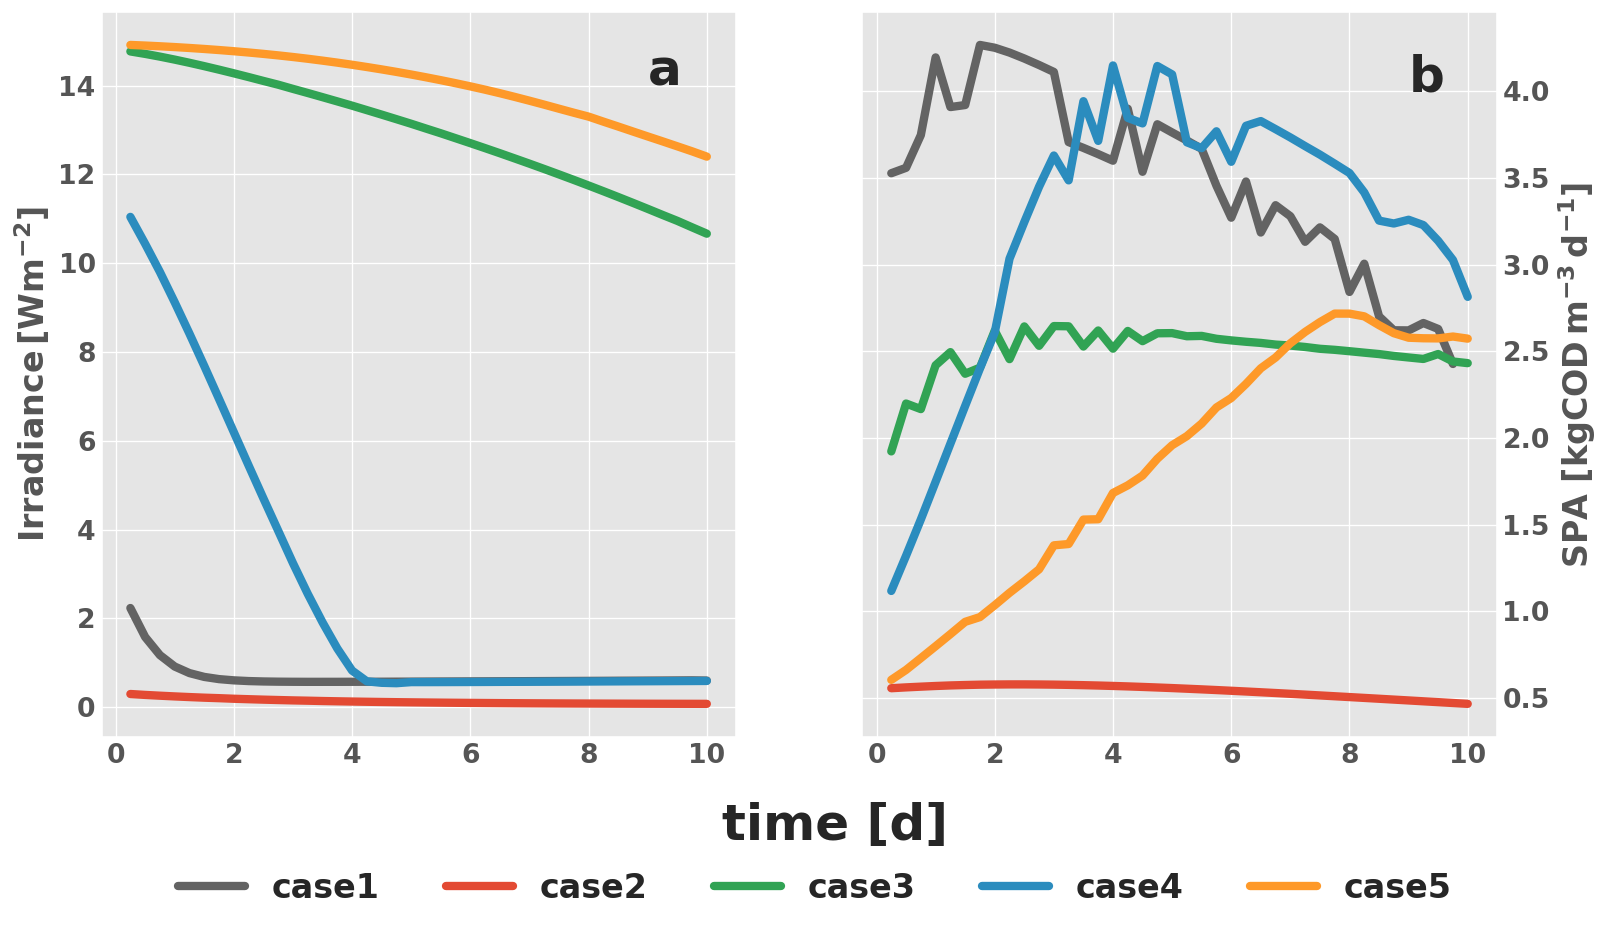

In [131]:
fig = plt.figure(figsize=(15,8), dpi=120)
ax1 = fig.add_subplot(121)

ax1.tick_params(axis="both",
               reset=False,
               labelsize=16)
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)

plt.plot(case1['times'], case1['irrad'],
        label='case1',
        color="#636363",
        linewidth=5)

plt.plot(case2['times'], case2['irrad'],
        label='case2',
        color='#e34a33',
        linewidth=5)

plt.plot(case2['times'], case3['irrad'],
        label="case3",
        color="#31a354",
        linewidth=5)

plt.plot(case2['times'], case4['irrad'],
        label='case4',
        color='#2b8cbe',
        linewidth=5)

plt.plot(case2['times'], case5['irrad'],
        label='case5',
        color='#fe9929',
        linewidth=5)

plt.ylabel("$\mathbf{Irradiance \, [Wm^{-2}}$]",
          fontweight='bold',
          fontsize=20)


plt.text(10.25, -3, "time [d]", fontsize=30)
plt.text(9, 14, "a", fontsize=30)
ax2 = fig.add_subplot(1,2,2)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')

ax2.tick_params(axis="both",
               reset=False,
               labelsize=16)
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)

plt.plot(case1['times'][:-1], case1['spa'][:-1],
        label='case1',
        color="#636363",
        linewidth=5)

plt.plot(case2['times'], case2['spa'],
        label='case2',
        color='#e34a33',
        linewidth=5)

plt.plot(case2['times'], case3['spa'],
        label="case3",
        color="#31a354",
        linewidth=5)

plt.plot(case2['times'], case4['spa'],
        label='case4',
        color='#2b8cbe',
        linewidth=5)

plt.plot(case2['times'], case5['spa'],
        label='case5',
        color='#fe9929',
        linewidth=5)

plt.ylabel("SPA [$\mathbf{kgCOD\, m^{-3}\, d^{-1}}$]",
          fontweight='bold',
          fontsize=20)
plt.text(9,4, "b", fontsize=30)
plt.legend(loc=(-1.1, -0.25), ncol=5, fontsize=20)


plt.savefig("./post_processing/2D_cases/vol_averaged.png", bbox_inches="tight")

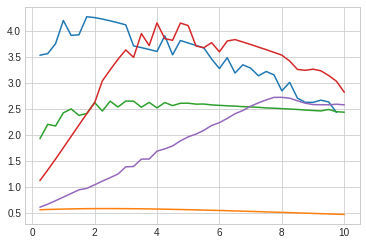